In [1]:
import argparse
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import torch
import numpy as np 

from preprocess import get_mnist, get_webcam
from train import TrainerVaDE

In [2]:
class Args:
    batch_size = 128
    lr = 1e-5
    dataset = 'mnist'
    pretrained_path = 'weights/pretrained_parameter.pth'
    patience = 50
    pretrain = True
    epochs = 200
    n_shots = 1


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    
args = Args() # Parsing all the arguments for the training
if args.dataset == 'mnist':
    dataloader_train, dataloader_test = get_mnist(args)
    n_classes = 10
else:
    dataloader_train, dataloader_test = get_webcam(args)
    n_classes = 31

In [3]:
vade = TrainerVaDE(args, device, dataloader_train, dataloader_test, n_classes)

In [4]:
vade.pretrain()

Training the autoencoder...


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Training Autoencoder... Epoch: 0, Loss: 24.813116800040007
Training Autoencoder... Epoch: 1, Loss: 16.017034260556102
Training Autoencoder... Epoch: 2, Loss: 12.657139545306563
Training Autoencoder... Epoch: 3, Loss: 11.151078633964062
Training Autoencoder... Epoch: 4, Loss: 10.045890863984823
Training Autoencoder... Epoch: 5, Loss: 9.023528141900897
Training Autoencoder... Epoch: 6, Loss: 8.462498225271702
Training Autoencoder... Epoch: 7, Loss: 7.962670523673296
Training Autoencoder... Epoch: 8, Loss: 7.580389530397952
Training Autoencoder... Epoch: 9, Loss: 7.177046298980713
Training Autoencoder... Epoch: 10, Loss: 6.864844150841236
Training Autoencoder... Epoch: 11, Loss: 6.634376826696098
Training Autoencoder... Epoch: 12, Loss: 6.477963502518833
Training Autoencoder... Epoch: 13, Loss: 6.2927081463858485
Training Autoencoder... Epoch: 14, Loss: 6.192284859716892
Training Autoencoder... Epoch: 15, Loss: 6.083222135901451
Training Autoencoder... Epoch: 16, Loss: 5.985840539447963
T

In [5]:
import numpy as np 


if args.dataset == 'webcam':
    classes = ['back_pack',
                'bike',
                'bike_helmet',
                'bookcase',
                'bottle',
                'calculator',
                'desk_chair',
                'desk_lamp',
                'desktop_computer',
                'file_cabinet',
                'headphones',
                'keyboard',
                'laptop_computer',
                'letter_tray',
                'mobile_phone',
                'monitor',
                'mouse',
                'mug',
                'paper_notebook',
                'pen',
                'phone',
                'printer',
                'projector',
                'punchers',
                'ring_binder',
                'ruler',
                'scissors',
                'speaker',
                'stapler',
                'tape_dispenser',
                'trash_can']
else:
    classes = ['0',
               '1',
               '2',
               '3',
               '4',
               '5',
               '6',
               '7',
               '8',
               '9']


def get_latent_space(dataloader, z_dim, model, device, ftr_ext=None):
    z = torch.zeros((1, z_dim)).float().to(device)
    y = torch.zeros((1)).long().to(device)
    with torch.no_grad():
        for img, label in dataloader:
            img, label = img.to(device).float(), label.to(device).long()
            if ftr_ext is not None:
                img = ftr_ext(img); img = img.detach()

            z_l = model.encode(img)
            y = torch.cat((y, label), dim=0)
            z = torch.cat((z, z_l), dim=0)
    return z[1:], y[1:]


def plot_tsne(X_embedded, y, ticks):
    f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15,5))

    cmap = plt.get_cmap('jet', 31)


    cax = ax1.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y.numpy(),
                      s=15, cmap=cmap)

    cbar = f.colorbar(cax, ticks=np.linspace(0,30,31))
    cbar.ax.set_yticklabels(ticks)

    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)

    plt.show()

In [8]:
z_dim = 10
model = vade.autoencoder
#ftr_ext = vade.feature_extractor
z, y = get_latent_space(dataloader_test, z_dim, model, device)
z, y = z.cpu(), y.cpu()

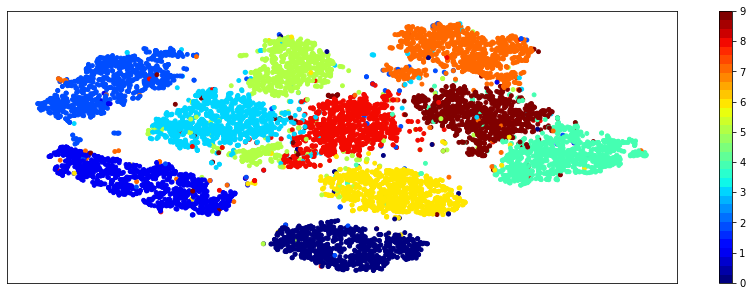

In [9]:
z_embedded = TSNE(n_components=2).fit_transform(z.detach().numpy())
plot_tsne(z_embedded, y, classes)